In [9]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt

In [3]:
import gt_apps as my_apps

In [4]:
help(my_apps)

Help on module gt_apps:

NAME
    gt_apps - This module uses GtApp to wraps the Science Tools as python objects.

DATA
    TsMap = <GtApp.GtApp object>
    addCubes = <GtApp.GtApp object>
    counts_map = <GtApp.GtApp object>
    diffResps = <GtApp.GtApp object>
    evtbin = <GtApp.GtApp object>
    expCube = <GtApp.GtApp object>
    expMap = <GtApp.GtApp object>
    filter = <GtApp.GtApp object>
    gtexpcube2 = <GtApp.GtApp object>
    like = <GtApp.GtApp object>
    maketime = <GtApp.GtApp object>
    model_map = <GtApp.GtApp object>
    obsSim = <GtApp.GtApp object>
    rspgen = <GtApp.GtApp object>
    srcMaps = <GtApp.GtApp object>

FILE
    /home/dhsong/anaconda3/envs/fermipy/lib/python3.7/site-packages/fermitools/gt_apps.py




# 0. Using Fermi-LAT All-sky Weekly Data


https://fermi.gsfc.nasa.gov/ssc/data/analysis/scitools/LAT_weekly_allsky.html

Spacecraft file: "/work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits"  
Photon data: "/work/cascades/dhsong/weekly/photon/filelist.txt"  
Extended data: "/work/cascades/dhsong/weekly/extended/filelist.txt"

# 1. Event Selection with gtselect

https://raw.githubusercontent.com/fermi-lat/fermitools-fhelp/master/gtselect.txt

Used to make cuts based on columns in the event data file such as time, energy, position, zenith angle, instrument coordinates, event class, and event type (new in Pass 8).

- Time (tmin, tmax)  
    Time Converter: https://heasarc.gsfc.nasa.gov/cgi-bin/Tools/xTime/xTime.pl  
    Start: 2008-08-04 15:43:36 UTC; 239557417 (MET)  
    4FGL: 2016-08-02 05:44:00 UTC; 	491809444 (MET)  
    4FGL-DR2: 2018-08-02 19:13:00 UTC; 554929985 (MET)  
    4FGL-DR3: 2020-08-02 08:33:00 UTC; 	618049985 (MET)
    
    
- Energy (emin, emax)  
    range: 30 MeV to 10 TeV  
    default: 100 MeV to 300 GeV
    
    
- Position (ra, dec, rad)  
    Coordinate Converter: https://www.astrouw.edu.pl/~jskowron/ra-dec/  
    Galactic center: l = 0 deg, b = 0 deg; RA = 266.4050 deg, DEC = -28.9362 deg
    
    
- Event Class (evclass)  
    Source: 128 (default)
    
    
- Event Type (evtype)
    
    
- Maximum Zenith Angle (zmax)  
    Range: 0  to 180 (default)
    
- Output event FITS file (outfile)  
    "_filtered.fits"

In [1]:
# - Minimum Event class ID (evclsmin)
# - Maximum Event class ID (evclsmax)
# - Event conversion type ID (convtype)
# - Minimum pulse phase (phasemin)
# - Maximum pulse phase (phasemax)

In [3]:
%%bash
gtselect evclass=128 evtype=3
    @/work/cascades/dhsong/weekly/photon/filelist.txt
    ./temp/GC_20x20_filtered.fits
    266.4050
    -28.9362
    20
    239557417
    618049985
    100
    500000
    90

#### Parameters:
# Input file or files (if multiple files are in a .txt file,
#        don't forget the @ symbol)
# Output file
# RA for new search center
# Dec or new search center
# Radius of the new search region
# Start time (MET in s)
# End time (MET in s)
# Lower energy limit (MeV)
# Upper energy limit (MeV)
# Maximum zenith angle value (degrees)

Input FT1 file[@/work/cascades/dhsong/weekly/photon/filelist.txt]     @/work/cascades/dhsong/weekly/photon/filelist.txt
s
RA for new search center (degrees) (0:360) [266.405]     266.4050
Dec for new search center (degrees) (-90:90) [-28.9362]     -28.9362
radius of new search region (degrees) (0:180) [20]     20
start time (MET in s) (0:) [239557417]     239557417
end time (MET in s) (0:) [618049985]     618049985
lower energy limit (MeV) (0:) [100]     100
upper energy limit (MeV) (0:) [500000]     500000
maximum zenith angle value (degrees) (0:180) [90]     90
Done.


You can also do it with Python.

In [6]:
my_apps.filter['evclass'] = 128
my_apps.filter['evtype'] = 3
my_apps.filter['ra'] = 266.4050
my_apps.filter['dec'] = -28.9362
my_apps.filter['rad'] = 20
my_apps.filter['emin'] = 100
my_apps.filter['emax'] = 500000
my_apps.filter['zmax'] = 90
my_apps.filter['tmin'] = 239557417
my_apps.filter['tmax'] = 618049985
my_apps.filter['infile'] = '@/work/cascades/dhsong/weekly/photon/filelist.txt'
my_apps.filter['outfile'] = './temp/py_GC_20x20_filtered.fits'

In [7]:
my_apps.filter.command()

'time -p gtselect infile=@/work/cascades/dhsong/weekly/photon/filelist.txt outfile=./temp/py_GC_20x20_filtered.fits ra=266.405 dec=-28.9362 rad=20.0 tmin=239557417.0 tmax=618049985.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"'

In [8]:
my_apps.filter.run()

time -p gtselect infile=@/work/cascades/dhsong/weekly/photon/filelist.txt outfile=./temp/py_GC_20x20_filtered.fits ra=266.405 dec=-28.9362 rad=20.0 tmin=239557417.0 tmax=618049985.0 emin=100.0 emax=500000.0 zmin=0.0 zmax=90.0 evclass=128 evtype=3 convtype=-1 phasemin=0.0 phasemax=1.0 evtable="EVENTS" chatter=2 clobber=yes debug=no gui=no mode="ql"
Done.
real 2486.05
user 1726.04
sys 178.90


In [7]:
GC_20x20_filtered = fits.open('./temp/GC_20x20_filtered.fits')

In [8]:
GC_20x20_filtered.info()

Filename: ./temp/GC_20x20_filtered.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    224   25402262R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   67012R x 2C   [D, D]   


# 2. Time Selection with gtmktime

In addition to cutting the selected events, gtmktime makes cuts based on the spacecraft file and updates the Good Time Interval (GTI) extension.

- Spacecraft file (scfile)


- Filter (filter)  
    Syntax: ! (not), && (and), || (or), != (different), >, <, >=, <=, abs(), cos(), sin(), etc.  
    Recommended: (DATA_QUAL>0)&&(LAT_CONFIG==1)
    
    
- Apply ROI-based zenith angle cut (roicut)  
    It is recommended tp apply the zenith cut to the livetime calculation while running gtltcube, not here.
    

- Input event file (evfile)  
    Output from gtselect

    
- Output event FITS file (outfile)  
    "_gti.fits"

With command line:

In [2]:
%%bash
gtmktime
    /work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits
    (DATA_QUAL>0)&&(LAT_CONFIG==1)
    no
    ./temp/GC_20x20_filtered.fits
    ./temp/GC_20x20_filtered_gti.fits
    
#### Parameters specified above are:
# Spacecraft file
# Filter expression
# Apply ROI-based zenith angle cut
# Event data file
# Output event file name

Spacecraft data file[/work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits]     /work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits
Filter expression[(DATA_QUAL>0)&&(LAT_CONFIG==1)]     (DATA_QUAL>0)&&(LAT_CONFIG==1)
Apply ROI-based zenith angle cut[no]     no
s
Output event file name[./temp/GC_20x20_filtered_gti.fits]     ./temp/GC_20x20_filtered_gti.fits


With python:

In [6]:
my_apps.maketime['scfile'] = '/work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits'
my_apps.maketime['filter'] = '(DATA_QUAL>0)&&(LAT_CONFIG==1)'
my_apps.maketime['roicut'] = 'no'
my_apps.maketime['evfile'] = './temp/py_GC_20x20_filtered.fits'
my_apps.maketime['outfile'] = './temp/py_GC_20x20_filtered_gti.fits'

time -p gtmktime scfile=/work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits sctable="SC_DATA" filter="(DATA_QUAL>0)&&(LAT_CONFIG==1)" roicut=no evfile=./temp/py_GC_20x20_filtered.fits evtable="EVENTS" outfile="./temp/py_GC_20x20_filtered_gti.fits" apply_filter=yes overwrite=no header_obstimes=yes tstart=0.0 tstop=0.0 gtifile="default" chatter=2 clobber=yes debug=no gui=no mode="ql"
real 491.65
user 454.10
sys 14.65


In [ ]:
my_apps.maketime.run()

In [10]:
GC_20x20_filtered_gti = fits.open('./temp/GC_20x20_filtered_gti.fits')

In [11]:
GC_20x20_filtered_gti.info()

Filename: ./temp/GC_20x20_filtered_gti.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      31   ()      
  1  EVENTS        1 BinTableHDU    227   25309187R x 23C   [E, E, E, E, E, E, E, E, E, D, J, J, I, 3I, 32X, 32X, I, D, E, E, E, E, E]   
  2  GTI           1 BinTableHDU     46   66861R x 2C   [D, D]   


# 3. Binning the Data

You can use gtbin to bin photon data into the following representations:  
Images (maps)  
Light curves  
Energy spectra (PHA files)

With command line:

In [12]:
%%bash
gtbin
    CMAP
    ./temp/GC_20x20_filtered_gti.fits
    ./temp/GC_20x20_cmap.fits
    /work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits
    400
    400
    0.1
    CEL
    266.4050
    -28.9362
    0
    AIT

#### Parameters:
# Type of output file (CCUBE|CMAP|LC|PHA1|PHA2)
# Event data file name
# Output file name
# Spacecraft data file name [NONE is valid]
# Size of the X axis in pixels
# Size of the Y axis in pixels
# Image scale (in degrees/pixel)
# Coordinate system (CEL - celestial, GAL -galactic) (CEL|GAL)
# First coordinate of image center in degrees (RA or galactic l)
# Second coordinate of image center in degrees (DEC or galactic b)
# Rotation angle of image axis, in degrees
# Projection method e.g. AIT|ARC|CAR|GLS|MER|NCP|SIN|STG|TAN
#
# For strange reasons, gtbin cannot be run with the ! magic; instead, we use the %%bash magic.

This is gtbin version HEAD
Type of output file (CCUBE|CMAP|LC|PHA1|PHA2|HEALPIX) [PHA2]     CMAP
Event data file name[]     ./temp/py_GC_20x20_filtered_gti.fits
Output file name[]     ./temp/py_GC_20x20_cmap.fits
Spacecraft data file name[NONE]     /work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits
Size of the X axis in pixels[]     400
Size of the Y axis in pixels[]     400
Image scale (in degrees/pixel)[]     0.1
Coordinate system (CEL - celestial, GAL -galactic) (CEL|GAL) [CEL]     CEL
First coordinate of image center in degrees (RA or galactic l)[]     266.4050
Second coordinate of image center in degrees (DEC or galactic b)[]     -28.9362
Rotation angle of image axis, in degrees[0.]     0
Projection method e.g. AIT|ARC|CAR|GLS|MER|NCP|SIN|STG|TAN:[AIT]     AIT


With python (also in GAL coordinates):

In [28]:
my_apps.evtbin['algorithm'] = 'CMAP'
my_apps.evtbin['evfile'] = './temp/py_GC_20x20_filtered_gti.fits'
my_apps.evtbin['outfile'] = './temp/py_GC_20x20_cmap.fits'
my_apps.evtbin['scfile'] = '/work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits'
my_apps.evtbin['nxpix'] = 400
my_apps.evtbin['nypix'] = 400
my_apps.evtbin['binsz'] = 0.1
my_apps.evtbin['xref'] = 0
my_apps.evtbin['yref'] = 0
my_apps.evtbin['axisrot'] = 0
my_apps.evtbin['proj'] = 'AIT'
my_apps.evtbin['coordsys'] = 'GAL'

In [29]:
my_apps.evtbin.run()

time -p gtbin evfile=./temp/py_GC_20x20_filtered_gti.fits scfile=/work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits outfile=./temp/py_GC_20x20_cmap.fits algorithm="CMAP" ebinalg="LOG" emin=30.0 emax=200000.0 ebinfile=NONE tbinalg="LIN" tbinfile=NONE nxpix=400 nypix=400 binsz=0.1 coordsys="GAL" xref=0.0 yref=0.0 axisrot=0.0 rafield="RA" decfield="DEC" proj="AIT" hpx_ordering_scheme="RING" hpx_order=3 hpx_ebin=yes hpx_region="" evtable="EVENTS" sctable="SC_DATA" efield="ENERGY" tfield="TIME" chatter=2 clobber=yes debug=no gui=no mode="ql"
This is gtbin version HEAD
real 33.53
user 30.67
sys 2.26


In [22]:
GC_20x20_cmap = fits.open('./temp/GC_20x20_cmap.fits')

In [23]:
GC_20x20_cmap.info()

Filename: ./temp/GC_20x20_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     130   (400, 400)   int32   
  1  GTI           1 BinTableHDU     48   66861R x 2C   [D, D]   


/home/dhsong/anaconda3/envs/fermipy/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


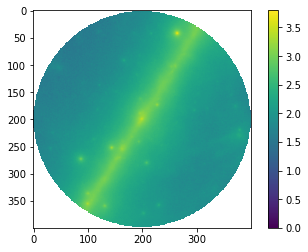

In [27]:
plt.imshow(np.log10(GC_20x20_cmap[0].data))
plt.colorbar()

In [30]:
py_GC_20x20_cmap = fits.open('./temp/py_GC_20x20_cmap.fits')

In [31]:
py_GC_20x20_cmap.info()

Filename: ./temp/py_GC_20x20_cmap.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     130   (400, 400)   int32   
  1  GTI           1 BinTableHDU     48   66861R x 2C   [D, D]   


/home/dhsong/anaconda3/envs/fermipy/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


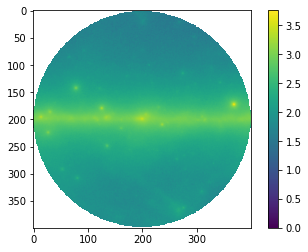

In [32]:
plt.imshow(np.log10(py_GC_20x20_cmap[0].data))
plt.colorbar()

# 4. Examining Exposure Maps

## 4.1 Calculate the Livetime

https://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data_Exploration/livetime_and_exposure.html

Generally, to look at the exposure you must:
- Make an livetime cube from the spacecraft data file using gtltcube.  
- As necessary, merge multiple livetime cubes covering different time ranges.  
- Create the exposure map using the gtexpmap tool.

In [1]:
!gtltcube zmax = 90 \
    evfile = ./temp/GC_20x20_filtered_gti.fits \
    scfile = /work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits \
    outfile = ./temp/GC_20x20_ltcube.fits \
    dcostheta = 0.025 \
    binsz = 1

#### gtltcube Parameters:
# Event data file
# Spacecraft data file
# Output file
# Step size in cos(theta) (0.:1.)
# Pixel size (degrees)
#
# May take a while to finish

Working on file /work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits
.....................!


With python:

In [5]:
my_apps.expCube['evfile'] = './temp/py_GC_20x20_filtered_gti.fits'
my_apps.expCube['scfile'] = '/work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits'
my_apps.expCube['outfile'] = './temp/py_GC_20x20_ltcube.fits'
my_apps.expCube['zmax'] = 90
my_apps.expCube['dcostheta'] = 0.025
my_apps.expCube['binsz'] = 1

In [6]:
my_apps.expCube.run()

time -p gtltcube evfile="./temp/py_GC_20x20_filtered_gti.fits" evtable="EVENTS" scfile=/work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits sctable="SC_DATA" outfile=./temp/py_GC_20x20_ltcube.fits dcostheta=0.025 binsz=1.0 phibins=0 tmin=0.0 tmax=0.0 file_version="1" zmin=0.0 zmax=90.0 chatter=2 clobber=yes debug=no gui=no mode="ql"
Working on file /work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits
.....................!
real 10131.88
user 10125.32
sys 5.79


In [11]:
GC_20x20_ltcube = fits.open('./temp/GC_20x20_ltcube.fits')
GC_20x20_ltcube.info()

Filename: ./temp/GC_20x20_ltcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      27   ()      
  1  EXPOSURE      1 BinTableHDU     59   49152R x 3C   [40E, E, E]   
  2  WEIGHTED_EXPOSURE    1 BinTableHDU     59   49152R x 3C   [40E, E, E]   
  3  CTHETABOUNDS    1 BinTableHDU     33   40R x 2C   [E, E]   
  4  GTI           1 BinTableHDU     46   66861R x 2C   [D, D]   


In [12]:
GC_20x20_ltcube[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / 8-bit bytes                                    
NAXIS   =                    2 / 2-dimensional binary table                     
NAXIS1  =                  168 / width of table in bytes                        
NAXIS2  =                49152 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
TFIELDS =                    3 / number of fields in each row                   
TTYPE1  = 'COSBINS '           / label for field                                
TFORM1  = '40E     '           / data format of field: 4-byte REAL              
TTYPE2  = 'RA      '           / RA of HEALPixel center                         
TFORM2  = 'E       '           / format of field                                
TTYPE3  = 'DEC     '        

### 4.1.1 Combining multiple livetime cubes

See https://github.com/fermi-lat/AnalysisThreads/blob/master/DataSelection/3.ExploreLATData/3.ExploreLATData.ipynb

## 4.2 Generate an Exposure Map or Cube

### 4.2.1 Exposure maps with gtexpmap

With command line:

In [7]:
!gtexpmap \
    evfile = ./temp/GC_20x20_filtered_gti.fits \
    scfile = /work/cascades/dhsong/mission/spacecraft/lat_spacecraft_merged.fits \
    expcube = ./temp/GC_20x20_ltcube.fits \
    outfile = ./temp/GC_20x20_exposure_map.fits \
    irfs = P8R3_SOURCE_V3 \
    srcrad = 30 \
    nlong = 500 \
    nlat = 500 \
    nenergies = 30

#### gtexpmap Parameters:
# Event data file
# Spacecraft data file
# Exposure hypercube file
# Output file name
# Response functions
# Radius of the source region (in degrees)
# Number of longitude points (2:1000)
# Number of latitude points (2:1000)
# Number of energies (2:100)

# This will generate an exposure map.
# This may take a long time.

The exposure maps generated by this tool are meant
to be used for *unbinned* likelihood analysis only.
Do not use them for binned analyses.
Computing the ExposureMap using ./temp/GC_20x20_ltcube.fits
....................!


With python:

### 4.2.2 Exposure cubes gtexpcube2

In [8]:
%%bash
gtexpcube2
    ./temp/GC_20x20_ltcube.fits
    none
    ./temp/GC_20x20_expcube.fits
    P8R3_SOURCE_V3
    300
    300
    .2
    266.4050
    -28.9362
    0
    AIT
    CEL
    100
    500000
    37
    
#### gtexpmap Parameters:
# Event data file
# Spacecraft data file
# Exposure hypercube file
# Output file name
# Response functions
# Radius of the source region (in degrees)
# Number of longitude points (2:1000)
# Number of latitude points (2:1000)
# Number of energies (2:100)

# This will generate an exposure map.
# This may take a long time.

Livetime cube file[]     ./temp/GC_20x20_ltcube.fits
Counts map file[]     none
Output file name[]     ./temp/GC_20x20_expcube.fits
Response functions to use[CALDB]     P8R3_SOURCE_V3
Size of the X axis in pixels[INDEF]     300
Size of the Y axis in pixels[INDEF]     300
Image scale (in degrees/pixel)[INDEF]     .2
First coordinate of image center in degrees (RA or galactic l)[INDEF]     266.4050
Second coordinate of image center in degrees (DEC or galactic b)[INDEF]     -28.9362
Rotation angle of image axis, in degrees[0.]     0
Projection method e.g. AIT|ARC|CAR|GLS|MER|NCP|SIN|STG|TAN[CAR]     AIT
Coordinate system (CEL - celestial, GAL -galactic) (CEL|GAL) [GAL]     CEL
Start energy (MeV) of first bin[INDEF]     100
Stop energy (MeV) of last bin[INDEF]     500000
Number of logarithmically-spaced energy bins[INDEF]     37


Computing binned exposure map....................!


With python: